In [3]:
import matplotlib.pyplot as plot
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib import cm

In [4]:
a,b = 1,100

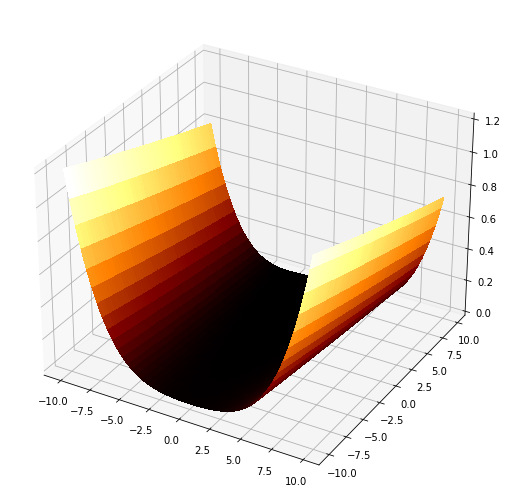

In [79]:
f = lambda x,y: (a - x)**2 + b * (y - x**2)**2

#1. 
fVisual = plot.figure(figsize=(12, 9))
visAxes = fVisual.gca(projection = '3d')

randomX = np.arange(-10, 10, 0.2)
randomY = np.arange(-10, 10, 0.2)

randomX, randomY = np.meshgrid(randomX, randomY)
Z = f(randomX,randomY)

visAxes.plot_surface(randomX, randomY, Z, cmap = cm.afmhot, antialiased = False)
plot.show()

#2.

$\nabla f=\left(\begin{array}{c}-2(a-x)-4b(y-x^2)\ x \\
                         2b(y-x^2)\end{array}\right)$

In [103]:
#3.
deltaF = lambda x,y: np.array([-2 * (a - x) - 4 * b * (y - x**2) * x, 2 * b * (y - x**2)])

func = lambda X: f(X[0], X[1])
dFunc = lambda X: deltaF(X[0], X[1])


In [132]:
#4. 
iVal1 = np.array([-10])
iVal2 = np.array([-10])
iVal = np.array([iVal1, iVal2])

lr = 0.000005

z = func(iVal)[0]

xList = []
yList = []
zList = []

xList.append(iVal1)
yList.append(iVal2)
zList.append([z])

for i in range (10000):
    iVal = iVal - (lr * dFunc(iVal))
    iVal1, iVal2 = iVal
    z = func(iVal)[0]
    
    xList.append(iVal1)
    yList.append(iVal2)
    zList.append([z])


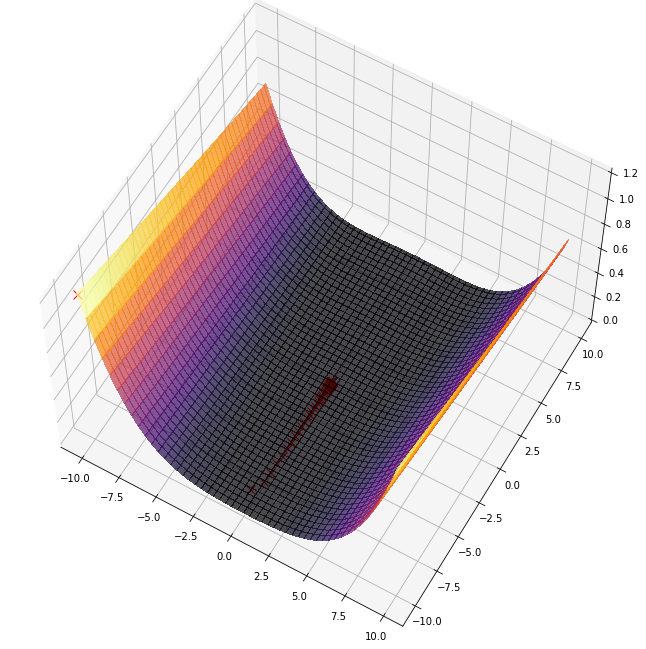

In [134]:
#5.
tPlot = plot.figure(figsize = (12, 9))
plotAxes = tPlot.gca(projection = '3d')

plotAxes.plot_surface(randomX, randomY, Z, cmap=cm.inferno, antialiased=False, alpha=0.7)

for i in range (0, len(xList) - 1, 100):
    
    plotAxes.plot(xList[i], yList[i], zList[i], 'x', c='red', markersize=9)
    iVal1 = np.concatenate([xList[i], xList[i+1]])
    iVal2 = np.concatenate([yList[i], yList[i+1]])
    z = np.concatenate([zList[i], zList[i+1]])  

plotAxes.view_init(60, -60)

plot.tight_layout()    
    